Use the assignment 2 dataset provided on Github to build a machine learning pipeline with Scikit Learn. The pipeline should bundle together all data preprocessing steps and hyperparameter tuning methods in a single pipline. At the end you'll create a machine learning model and deploy it with either Dash, Flask, Streamlit, FastAPI or Djang

In [1]:
#standard imports
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import data
df = pd.read_csv('banking_churn.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [5]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [6]:
df.replace({'Geography': {'France':2, "Germany":1, 'Spain':0}}, inplace=True)

In [7]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [8]:
df.replace({'Gender': {'Male': 0, 'Female':1}}, inplace=True)

In [9]:
df['NumOfProducts'].value_counts()

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

In [10]:
df.replace({'NumOfProducts': {1: 0, 2:1, 3:1, 4:1}}, inplace=True)

In [11]:
df['HasCrCard'].value_counts()

1    7055
0    2945
Name: HasCrCard, dtype: int64

In [12]:
df['IsActiveMember'].value_counts()

1    5151
0    4849
Name: IsActiveMember, dtype: int64

In [13]:
df.loc[(df['Balance']==0), 'Exited'].value_counts()

0    3117
1     500
Name: Exited, dtype: int64

In [14]:
df['Zero Balance'] = np.where(df['Balance']>0, 1, 0)

<AxesSubplot: >

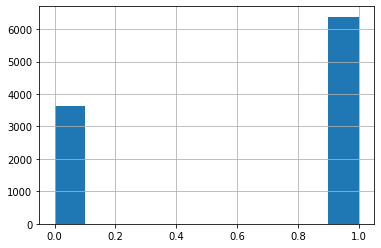

In [15]:
df['Zero Balance'].hist()

In [16]:
df.groupby(['Exited', 'Geography']).count()

RowNumber  CustomerId  Surname  CreditScore  Gender   Age  \
Exited Geography                                                              
0      0               2064        2064     2064         2064    2064  2064   
       1               1695        1695     1695         1695    1695  1695   
       2               4204        4204     4204         4204    4204  4204   
1      0                413         413      413          413     413   413   
       1                814         814      814          814     814   814   
       2                810         810      810          810     810   810   

                  Tenure  Balance  NumOfProducts  HasCrCard  IsActiveMember  \
Exited Geography                                                              
0      0            2064     2064           2064       2064            2064   
       1            1695     1695           1695       1695            1695   
       2            4204     4204           4204       4204            4204   
1      0             413      413            413        413             413   
       1             814      814            814        814             814   
       2             810      810            810        810             810   

                  EstimatedSalary  Zero Balance  
Exited Geography                                 
0      0                     2064          2064  
       1                     1695          1695  
       2                     4204          4204  
1      0                      413           413  
       1                      814           814  
       2                      810           810

In [17]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Zero Balance'],
      dtype='object')

In [18]:
X = df.drop([ 'Surname', 'Exited'], axis = 1)

In [19]:
y = df['Exited']

In [20]:
X.shape, y.shape

((10000, 13), (10000,))

In [21]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

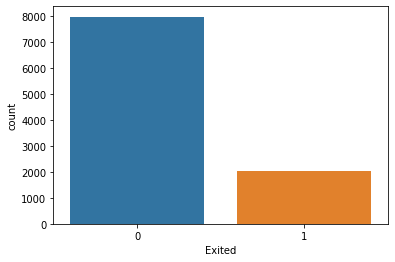

In [22]:
sns.countplot(x="Exited", data = df);

In [23]:
X.shape, y.shape

((10000, 13), (10000,))

In [24]:
# Splitting the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) 
# you can change the test size

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000, 13), (2000, 13), (8000,), (2000,))

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [26]:
X_train

,RowNumber,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Zero Balance
7751,7752,15588535,750,0,1,39,6,0.00,1,0,0,19264.33,0
4154,4155,15703437,726,2,0,34,3,0.00,1,1,0,196288.46,0
3881,3882,15794276,588,2,1,64,3,0.00,0,1,1,189703.65,0
9238,9239,15639133,773,2,1,50,4,0.00,1,1,0,129372.94,0
5210,5211,15738954,551,2,0,35,7,129717.30,1,0,0,86937.20,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3046,3047,15779862,658,1,1,31,3,133003.03,0,0,1,146339.27,1
9917,9918,15755731,635,1,0,53,8,117005.55,0,0,1,123646.57,1
4079,4080,15694601,583,2,1,31,4,158978.79,0,1,0,12538.92,1
2254,2255,15585533,679,2,0,36,6,147733.64,0,0,1,172501.38,1


In [27]:
# Try to predict with random forest on price column (doesn't work)
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.23757080382367723

In [28]:
X_train.dtypes

RowNumber            int64
CustomerId           int64
CreditScore          int64
Geography            int64
Gender               int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Zero Balance         int32
dtype: object

In [29]:
model.fit(X_train, y_train)

RandomForestRegressor()

In [30]:
model.score(X_test, y_test)

0.2230389720964433

In [31]:
# Import LinearSVC from the svm module
from sklearn.svm import LinearSVC

# Setup random seed
np.random.seed(42)

# Split the data into X (features/data) and y (target/labels)
X = df.drop([ 'Surname', 'Exited'], axis = 1)
y = df['Exited']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate and fit the model (on the training set)
clf = LinearSVC(max_iter=1000)
clf.fit(X_train, y_train)

# Check the score of the model (on the test set)
clf.score(X_test, y_test)

0.8035

In [32]:
# Import the RandomForestClassifier model class from the ensemble module
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Split the data into X (features/data) and y (target/labels)
X = df.drop([ 'Surname', 'Exited'], axis = 1)
y = df['Exited']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate and fit the model (on the training set)
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Check the score of the model (on the test set)
clf.score(X_test, y_test)

0.8505

In [33]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)
#Check the score of the model (on the test set)
clf.score(X_test, y_test)

0.8505

In [34]:
# Import the RandomForestRegressor model class from the ensemble module
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import load_boston
import pandas as pd
boston = load_boston()
boston_df = pd.DataFrame(boston["data"], columns=boston["feature_names"])
boston_df["Exited"] = pd.Series(boston["Exited"])


# Setup random seed
np.random.seed(42)

# Create the data
X = boston_df.drop(['Surname', 'Exited'], axis = 1)
y = boston_df['Exited']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Institate and fit the model (on the training set)
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Check the score of the model (on the test set)
model.score(X_test, y_test)

KeyError: 'Exited'

In [35]:
from sklearn.metrics import roc_curve

# Make predictions with probabilities
y_probs = clf.predict_proba(X_test)

# Keep the probabilites of the positive class only
y_probs = y_probs[:, 1]

# Calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Check the false positive rate
fpr

array([0.00000000e+00, 6.22277536e-04, 6.22277536e-04, 6.22277536e-04,
       6.22277536e-04, 6.22277536e-04, 6.22277536e-04, 6.22277536e-04,
       6.22277536e-04, 6.22277536e-04, 1.86683261e-03, 1.86683261e-03,
       3.11138768e-03, 3.11138768e-03, 3.11138768e-03, 3.11138768e-03,
       3.73366521e-03, 4.97822029e-03, 4.97822029e-03, 4.97822029e-03,
       4.97822029e-03, 6.22277536e-03, 6.84505289e-03, 8.71188550e-03,
       9.33416304e-03, 1.05787181e-02, 1.12009956e-02, 1.12009956e-02,
       1.12009956e-02, 1.36901058e-02, 1.43123833e-02, 1.49346609e-02,
       1.68014935e-02, 1.80460485e-02, 2.24019913e-02, 2.36465464e-02,
       2.48911014e-02, 2.73802116e-02, 2.92470442e-02, 3.11138768e-02,
       3.23584319e-02, 3.54698195e-02, 3.85812072e-02, 4.16925949e-02,
       4.29371500e-02, 4.54262601e-02, 5.04044804e-02, 5.28935905e-02,
       5.47604231e-02, 5.91163659e-02, 6.40945862e-02, 7.03173615e-02,
       7.28064717e-02, 7.59178594e-02, 8.58742999e-02, 9.08525202e-02,
      

In [36]:
thresholds

array([1.94, 0.94, 0.91, 0.9 , 0.88, 0.87, 0.86, 0.85, 0.84, 0.83, 0.82,
       0.81, 0.8 , 0.78, 0.77, 0.76, 0.75, 0.74, 0.73, 0.72, 0.71, 0.7 ,
       0.69, 0.68, 0.67, 0.66, 0.65, 0.64, 0.63, 0.62, 0.61, 0.6 , 0.59,
       0.58, 0.57, 0.56, 0.55, 0.54, 0.53, 0.52, 0.51, 0.5 , 0.49, 0.48,
       0.47, 0.46, 0.45, 0.44, 0.43, 0.42, 0.41, 0.4 , 0.39, 0.38, 0.37,
       0.36, 0.35, 0.34, 0.33, 0.32, 0.31, 0.3 , 0.29, 0.28, 0.27, 0.26,
       0.25, 0.24, 0.23, 0.22, 0.21, 0.2 , 0.19, 0.18, 0.17, 0.16, 0.15,
       0.14, 0.13, 0.12, 0.11, 0.1 , 0.09, 0.08, 0.07, 0.06, 0.05, 0.04,
       0.03, 0.02, 0.01, 0.  ])

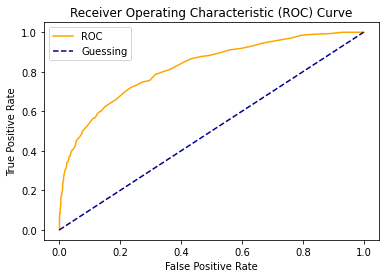

In [37]:
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positve rate (fpr) and 
    true postive rate (tpr) of a classifier.
    """
    # Plot ROC curve
    plt.plot(fpr, tpr, color='orange', label='ROC')
    # Plot line with no predictive power (baseline)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label='Guessing')
    # Customize the plot
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr, tpr)

In [38]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs)

0.8213517198136018

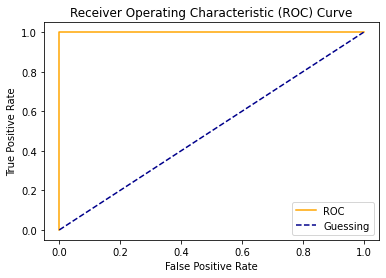

In [39]:
# Plot perfect ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [40]:
# Perfect ROC AUC score
roc_auc_score(y_test, y_test)

1.0

In [41]:
# Import the RandomForestRegressor model class from the ensemble module
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(42)

# Create the data
X = boston_df.drop(['Surname', 'Exited'], axis = 1)
y = boston_df['Exited']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Institate and fit the model (on the training set)
model = RandomForestRegressor()
model.fit(X_train, y_train);

KeyError: "['Surname', 'Exited'] not found in axis"

In [42]:
# Calculate the models R^2 score
model.score(X_test, y_test)

0.7579191545892572

In [43]:
from sklearn.metrics import r2_score

# Fill an array with y_test mean
y_test_mean = np.full(len(y_test), y_test.mean())

r2_score(y_test, y_test_mean)

0.0

In [44]:
# Mean absolute error
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)
mae = mean_absolute_error(y_test, y_preds)
mae

0.12055000000000002

In [45]:
df = pd.DataFrame(data={"actual values": y_test, 
                   "predictions": y_preds})

df.head(7)

,actual values,predictions
6252,0,0.02
4684,0,0.02
1731,0,0.16
4742,0,0.13
4521,0,0.01
6340,0,0.00
576,0,0.06


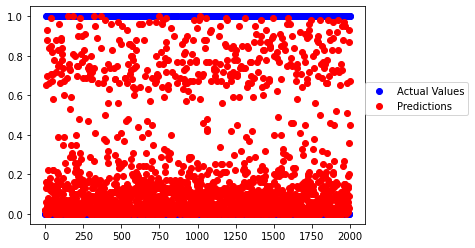

In [46]:
fig, ax = plt.subplots()
x = np.arange(0, len(df), 1)
ax.scatter(x, df["actual values"], c='b', label="Actual Values")
ax.scatter(x, df["predictions"], c='r', label="Predictions")
ax.legend(loc=(1, 0.5));

In [47]:
# Mean squared error
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_preds)
mse

0.038221599999999994

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2)

model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)

# Make predictions
y_preds = model.predict(X_test)

# Evaluate the model
print("Regression model metrics on the test set:")
print(f"R^2: {r2_score(y_test, y_preds):.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_preds):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_preds):.2f}")

In [48]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

In [49]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [50]:
# Hyperparameter grid RandomizedSearchCV will search over
grid = {"n_estimators": [10, 100, 200, 500, 1000, 1200],
        "max_depth": [None, 5, 10, 20, 30],
        "max_features": ["auto", "sqrt"],
        "min_samples_split": [2, 4, 6],
        "min_samples_leaf": [1, 2, 4]}

In [51]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split
np.random.seed(42)

# Split into X & y
X = df.drop(['Surname', 'Exited'], axis = 1)
y = df['Exited']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Set n_jobs to -1 to use all cores (NOTE: n_jobs=-1 is broken as of 8 Dec 2019, using n_jobs=1 works)
clf = RandomForestClassifier(n_jobs=1)

# Setup RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator=clf,
                            param_distributions=grid,
                            n_iter=20, # try 20 models total
                            cv=5, # 5-fold cross-validation
                            verbose=2) # print out results

# Fit the RandomizedSearchCV version of clf
rs_clf.fit(X_train, y_train);

KeyError: "['Surname', 'Exited'] not found in axis"